In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CCTV 설치 현황

In [2]:
CCTV_Seoul = pd.read_excel("./Data/CCTV_in_Seoul_2018.xlsx")
CCTV_Seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [3]:
CCTV_Seoul.tail()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
20,용산구,2063,1279.0,152.0,201.0,107,102,89,60,73
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중랑구,1068,NaN,NaN,NaN,770,102,121,66,9


In [4]:
# CCTV의 컬럼명 확인
CCTV_Seoul.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [5]:
# Data Type 확인
CCTV_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기관명       25 non-null     object 
 1   소계        25 non-null     int64  
 2   2011년 이전  23 non-null     float64
 3   2012년     23 non-null     float64
 4   2013년     23 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB


In [7]:
# 기관명 -> 구별
CCTV_Seoul.rename(
  columns={CCTV_Seoul.columns[0]:'구별'},
  inplace=True
)
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [12]:
# NaN데이터의 위치 및 내용 확인

CCTV_Seoul[CCTV_Seoul['2011년 이전'].isnull()]
CCTV_Seoul[CCTV_Seoul.iloc[:,2].isnull()]

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
10,동대문구,2003,NaN,NaN,NaN,1326,111,233,136,197
24,중랑구,1068,NaN,NaN,NaN,770,102,121,66,9


In [13]:
# 2011년 이전 컬럼의 NaN 갯수

len(CCTV_Seoul[CCTV_Seoul.iloc[:,2].isnull()])

2

In [14]:
# 반복문을 이용하여 NaN 갯수 파악
for i in range(2, len(CCTV_Seoul.columns)):
  nanCount = len(CCTV_Seoul[CCTV_Seoul.iloc[:,i].isnull()])
  print(f"{CCTV_Seoul.columns[i]} : {nanCount}")

2011년 이전 : 2
2012년 : 2
2013년 : 2
2014년 : 0
2015년 : 0
2016년 : 0
2017년 : 0
2018년 : 0


In [15]:
# NaN을 0으로 변환
CCTV_Seoul = CCTV_Seoul.fillna(0)

In [16]:
# 반복문을 이용하여 NaN 갯수 파악
for i in range(2, len(CCTV_Seoul.columns)):
  nanCount = len(CCTV_Seoul[CCTV_Seoul.iloc[:,i].isnull()])
  print(f"{CCTV_Seoul.columns[i]} : {nanCount}")

2011년 이전 : 0
2012년 : 0
2013년 : 0
2014년 : 0
2015년 : 0
2016년 : 0
2017년 : 0
2018년 : 0


---
# 인구현황

In [18]:
pop_Seoul = pd.read_excel("./Data/population_in_Seoul_2020.xlsx",
                          header=3,
                          usecols="B, D, G, J, N"
                          )
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [20]:
# 열이름 변경 (구별, 인구수, 한국인, 외국인, 고령자)

pop_Seoul.columns = ['구별','인구수','한국인','외국인','고령자']
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [21]:
# 합계 행을 삭제
pop_Seoul.drop(
  [0],
  inplace=True
)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989


In [22]:
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,516662,499374,17288,76664
22,서초구,434801,430568,4233,58332
23,강남구,549898,544804,5094,72602
24,송파구,680883,674095,6788,89539
25,강동구,457042,452646,4396,66401


In [23]:
pop_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구별      25 non-null     object
 1   인구수     25 non-null     int64 
 2   한국인     25 non-null     int64 
 3   외국인     25 non-null     int64 
 4   고령자     25 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


---
### CCTV 현황

In [26]:
# CCTV에서 CCTV가 가장 적은 순으로 확인 --> Top5

CCTV_Seoul.sort_values(
  by='소계',
  ascending=True
).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71
24,중랑구,1068,0.0,0.0,0.0,770,102,121,66,9
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328


> CCTV 댓수가 적은 지역으로는 도봉구, 중랑구, 강북구, 종로구, 중구 순이다.

In [27]:
# CCTV에서 CCTV가 가장 많은 순으로 확인 --> Top5

CCTV_Seoul.sort_values(
  by='소계',
  ascending=False
).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367


> CCTV 댓수가 많은 지역으로는 강남구, 관악구, 구로구, 성북구, 은평구 순이다.

### 최근증가율로 제일 많이 증가한 구를 추출

In [33]:
# 최근증가율 : 최근 3년치 CCTV 댓수 / 나머지 년도의 CCTV댓수 * 100

CCTV_Seoul['최근증가율'] = \
  CCTV_Seoul.iloc[:,7:10].sum(axis='columns') / \
    CCTV_Seoul.iloc[:,2:7].sum(axis='columns') * 100
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425


In [34]:
# 정렬후 Top5만 출력
CCTV_Seoul.sort_values(
  by='최근증가율',
  ascending=False
).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,139.443378
15,성동구,2679,665.0,109.0,118.0,101,258,201,933,294,114.148681
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295


> 최근 증가율이 높은 지역구는 중구, 영등포구, 성동구, 금천구, 광진구 순이다.

---
### 인구현황

In [38]:
# 구별의 확인 
len(pop_Seoul.구별.unique())

25

In [42]:
# 고령자 비율, 외국인 비율 추가
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,161984,151217,10767,28073,6.646953,17.330724
2,중구,136469,126175,10294,23794,7.543105,17.435462
3,용산구,246165,229579,16586,39439,6.737757,16.021368
4,성동구,307193,299042,8151,44728,2.653381,14.560228
5,광진구,365990,350417,15573,48989,4.255034,13.385338


In [43]:
# 인구수가 제일 많은 지역 Top5
pop_Seoul.sort_values(
  by='인구수',
  ascending=False
).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
23,강남구,549898,544804,5094,72602,0.926354,13.202812
11,노원구,535495,531037,4458,82682,0.832501,15.440294
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [44]:
# 외국인수가 많은 지역 Top5
pop_Seoul.sort_values(
  by='외국인',
  ascending=False
).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
17,구로구,438308,405837,32471,67432,7.408261,15.384615
18,금천구,251370,232583,18787,38508,7.473843,15.319251
21,관악구,516662,499374,17288,76664,3.346095,14.838328
6,동대문구,362793,346156,16637,60367,4.585811,16.639516


In [45]:
# 외국인 비율
pop_Seoul.sort_values(
  by='외국인비율',
  ascending=False
).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
2,중구,136469,126175,10294,23794,7.543105,17.435462
18,금천구,251370,232583,18787,38508,7.473843,15.319251
17,구로구,438308,405837,32471,67432,7.408261,15.384615
3,용산구,246165,229579,16586,39439,6.737757,16.021368


In [46]:
# 고령자수 정렬
pop_Seoul.sort_values(
  by='고령자',
  ascending=False
).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
11,노원구,535495,531037,4458,82682,0.832501,15.440294
12,은평구,482509,478019,4490,82245,0.930553,17.045278
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [47]:
pop_Seoul.sort_values(
  by='고령자비율',
  ascending=False
).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,316750,312985,3765,61660,1.188635,19.466456
10,도봉구,333495,331238,2257,60023,0.676772,17.998171
2,중구,136469,126175,10294,23794,7.543105,17.435462
1,종로구,161984,151217,10767,28073,6.646953,17.330724
12,은평구,482509,478019,4490,82245,0.930553,17.045278


> 인구수가 제일 많은 지역은 송파구 이지만, 영등포구가 외국인이 제일 많다.     
그리고 그 근처라고 할 수 있는 구로구, 금천구 등도 외국인이 많다.   
송파구는 고령자가 많지만 고령자 비율이 높지 않은 것으로 확인된다.   
하지만 강북구, 도봉구, 중구, 종로구, 은평구 같은 경우는 인구수 대비   
고령자 비율이 높기 때문에 추후 고령화가 우려된다.   

---
### CCTV와 인구현황 합치기

In [51]:
# CCTV데이터와 인구현황 데이터 합치기

data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [56]:
# 반복문을 통한 년도별 CCTV 컬럼 삭제
# del data_result['2012년']
# del data_result['2013년']

for i in data_result.columns[2:10]:
  del data_result[i]

data_result.head()


,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [57]:
# 인덱스 : 구별 컬럼으로 사용
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


---
## 상관계수
- 상관계수의 절대값이 0.3 이하 : 무시 
- 상관계수의 절대값이 0.3 이상 : 약한 상관관계 
- 상관계수의 절대값이 0.7 이상 : 뚜렷한 상관 관계 

In [58]:
# 고령자 비율과 소계의 상관계수
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.44225083],
       [-0.44225083,  1.        ]])

In [59]:
# 외국인 비율과 소계의 상관계수
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.06215538],
       [-0.06215538,  1.        ]])

In [61]:
# 인구수와 소계의 상관계수
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.38064812],
       [0.38064812, 1.        ]])

> 고령자 비율, 외국인 비율, 인구수를 비교 해보았을때     
고령자 비율과는 음의 상관이 발생하고, 인구수와 소계는 양의 상관이 발생한다.

---
## 시각화

In [62]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc

# 시각화 도구
from matplotlib import pyplot as plt
%matplotlib inline
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [64]:
# 정리가 되었으나 csv file로 저장

data_result.to_csv("./Data/CCTV_result.csv")

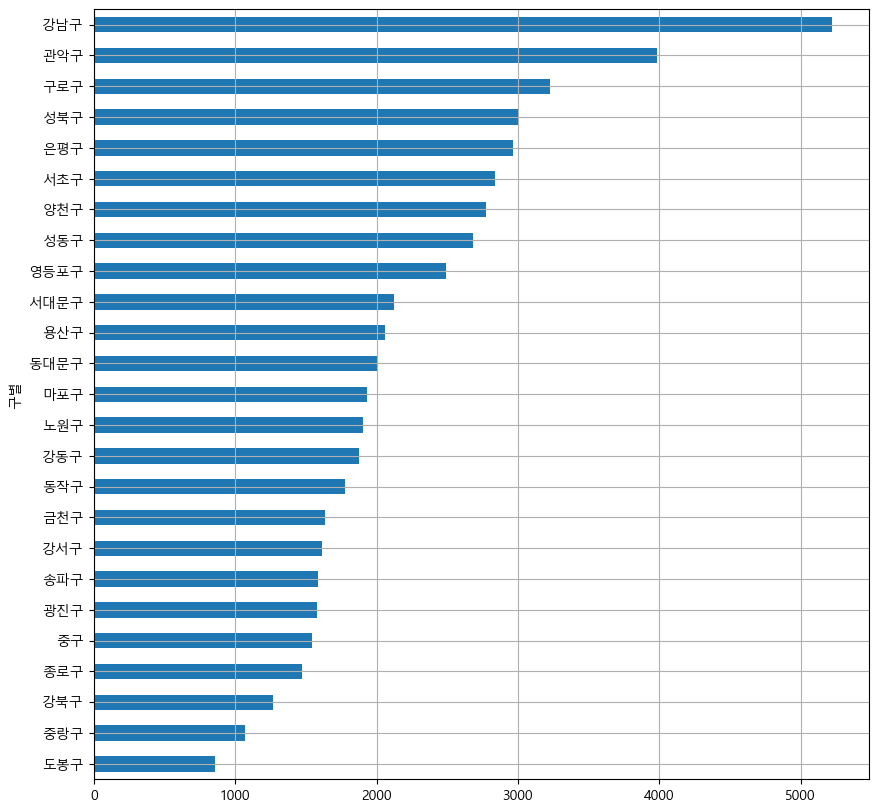

In [69]:
# 자치구별 CCTV소계의 가로 막대 그래프 
data_result['소계'].sort_values().plot(
  kind='barh',
  grid=True,
  figsize=(10, 10)
)

plt.show()

> CCTV 댓수 자체는 강남구가 월등하게 많은 것으로 확인 

---
### 인구 대비 CCTV 비율

<Axes: ylabel='구별'>

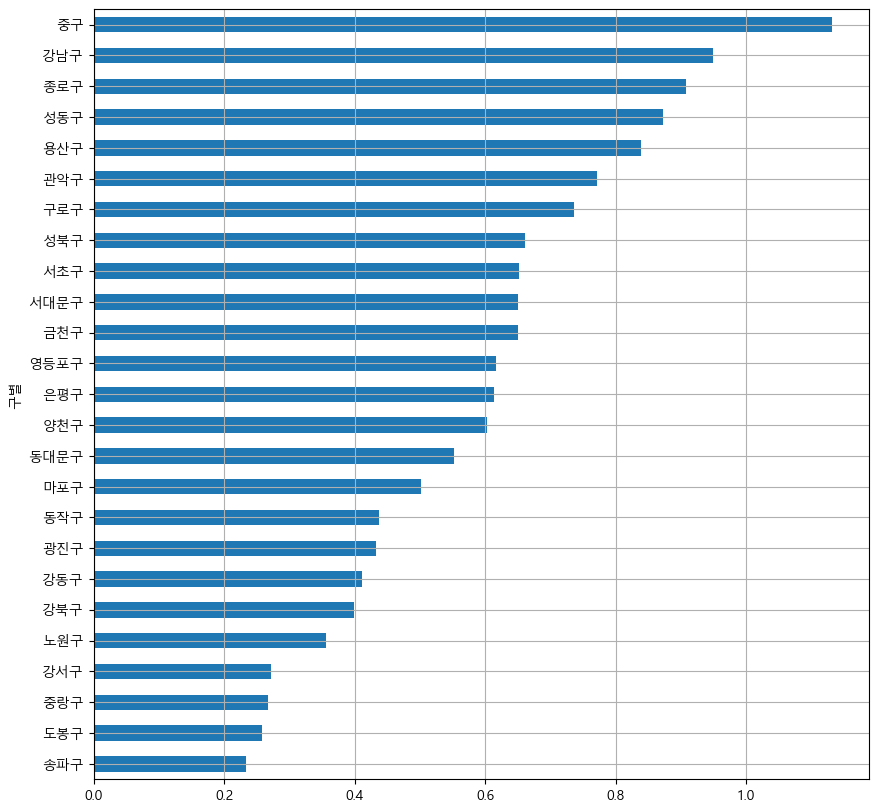

In [72]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(
  kind='barh',
  grid=True,
  figsize=(10,10)
)

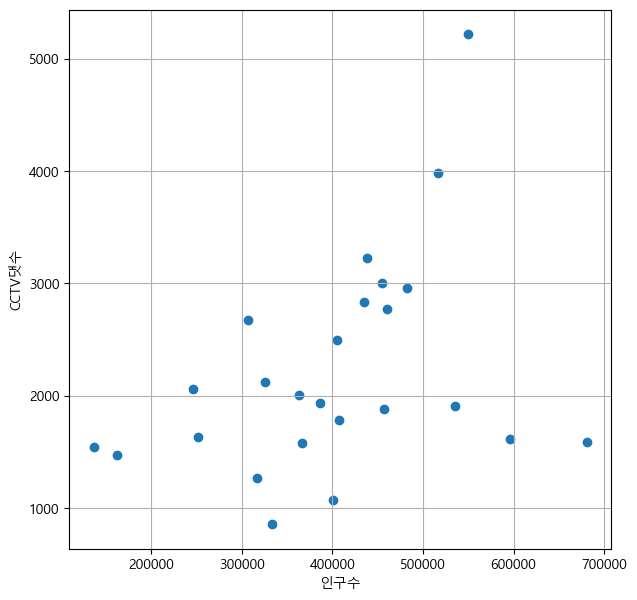

In [76]:
# 산점도를 이용한 시각화 

plt.figure(figsize=(7, 7))
plt.scatter(
  data_result['인구수'],
  data_result['소계']
)

plt.xlabel('인구수')
plt.ylabel('CCTV댓수')
plt.grid()
plt.show()

In [78]:
# 인구수, 소계에 따른 기준직선(회귀선, 평균선) 만들기
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([2.88522756e-03, 1.06403852e+03])

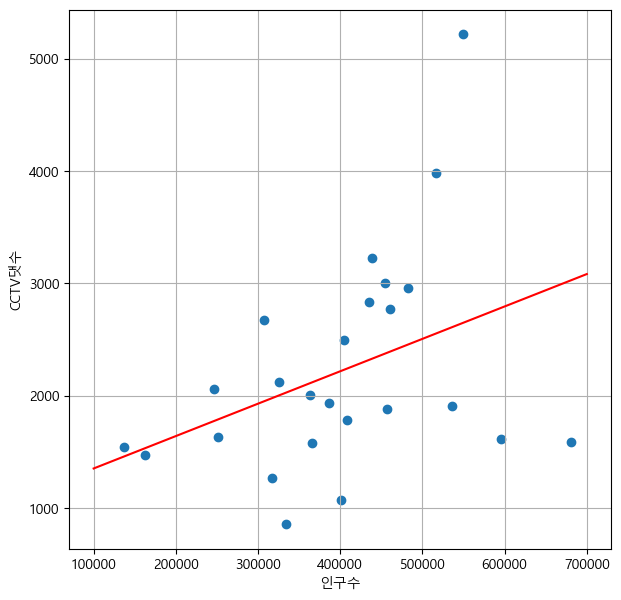

In [82]:
# y축 데이터 만들기
f1 = np.poly1d(fp1)

# x축 데이터 만들기
fx = np.linspace(100000, 700000)

plt.figure(figsize=(7, 7))
plt.scatter(
  data_result['인구수'],
  data_result['소계']
)

# 기준선 만들기
plt.plot(
  fx,
  f1(fx),
  color='red'
)

plt.xlabel('인구수')
plt.ylabel('CCTV댓수')
plt.grid()
plt.show()

> 이 직선은 CCTV댓수의 기준값이 됩니다.    
이 직선을 기준으로 상위에 있는 점은 과하게 설치 된 것이고,   
직선 보다 하위에 있는 점은 인구수에 비해 CCTV가 부족하다는 해석 입니다.  

##### 직선과의 오차를 구하는 공식과 오차가 큰 순으로 데이터 정렬후 그래프 그리기

In [92]:
# 소계에서 기준인구수 차이로 오차값 구하기
data_result['오차'] = \
  np.abs(data_result['소계'] - f1(data_result['인구수']))

# 오차 기준으로 정렬 
# data_result['오차'].sort_values(ascending=False)
df_sort = \
  data_result.sort_values(
    by='오차',
    ascending=False
  )

In [93]:
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,0.949449,2570.380612
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424,0.232933,1442.540920
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,0.771297,1430.274035
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171,0.257275,1168.247488
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,0.271444,1165.777237


### 그래프에 Text와 Color 적용

C:\Users\KDT\AppData\Local\Temp\ipykernel_23864\1128523163.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_sort['인구수'][n]*1.02,
C:\Users\KDT\AppData\Local\Temp\ipykernel_23864\1128523163.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_sort['소계'][n]*0.98,


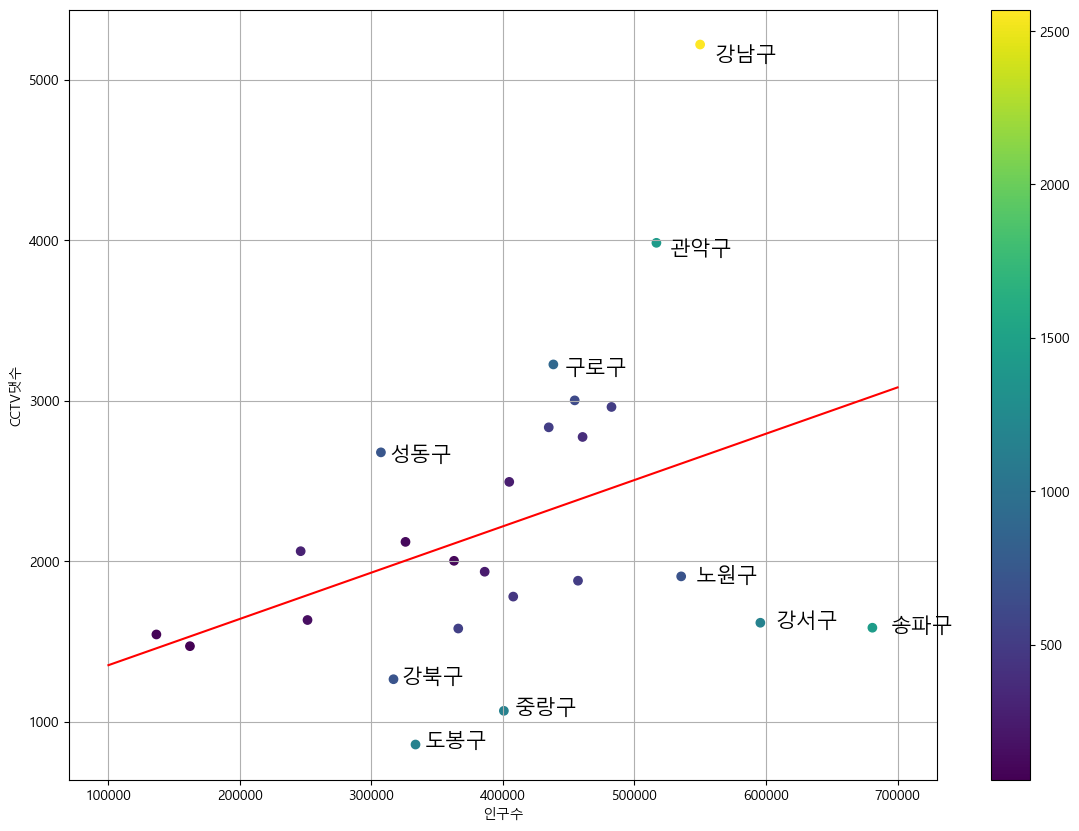

In [97]:
# y축 데이터 만들기
f1 = np.poly1d(fp1)

# x축 데이터 만들기
fx = np.linspace(100000, 700000)

plt.figure(figsize=(14, 10))
plt.scatter(
  data_result['인구수'],
  data_result['소계'],
  c=data_result['오차']
)

# 기준선 만들기
plt.plot(
  fx,
  f1(fx),
  color='red'
)

# 오차가 가장 큰 10개 구에 텍스트 넣기
for n in range(10):
  plt.text(df_sort['인구수'][n]*1.02, 
          df_sort['소계'][n]*0.98,
          df_sort.index[n],
          fontsize=15
          )

plt.xlabel('인구수')
plt.ylabel('CCTV댓수')
plt.colorbar()
plt.grid()
plt.show()